In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2020-01-09"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2020_1q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2020-01-09   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6712     ÎÇ®Íµ¨   8175     ÎÇ®Íµ¨   
1   2020-01-09     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300     ÎÇ®Íµ¨   6300     ÎÇ®Íµ¨   
2   2020-01-09     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   6250     ÎÇ®Íµ¨   6980     ÎÇ®Íµ¨   
3   2020-01-09    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4983     ÎÇ®Íµ¨   5471     ÎÇ®Íµ¨   
4   2020-01-09     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2690     ÎÇ®Íµ¨   2980     ÎÇ®Íµ¨   
5   2020-01-09    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5280     ÎÇ®Íµ¨   5495     ÎÇ®Íµ¨   
6   2020-01-09     ÎåÄÌåå                      1.0„éè   3490     ÎÇ®Íµ¨   3873     ÎÇ®Íµ¨   
7   2020-01-09   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   7450     ÎÇ®Íµ¨  12400     ÎÇ®Íµ¨   
8   2020-01-09     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4531     ÎÇ®Íµ¨   4531     ÎÇ®Íµ¨   
9   2020-01-09     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     ÎÇ®Íµ¨    676     ÎÇ®Íµ¨   
10  2020-01-09     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410     ÎÇ®Íµ¨   1540     ÎÇ®Íµ¨   
11  2020-01-09      Î¨¥                   2.0„éè 1Í∞ú   3873     ÎÇ®Íµ¨   5760     ÎÇ®Íµ¨   
12  2020-01-09    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
13  2020-01-09     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   3140     ÎÇ®Íµ¨   3660     ÎÇ®Íµ¨   
14  2020-01-09      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  19475     ÎÇ®Íµ¨  38431     ÎÇ®Íµ¨   
15  2020-01-09     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   1993     ÎÇ®Íµ¨   3280     ÎÇ®Íµ¨   
16  2020-01-09  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3900     ÎÇ®Íµ¨   6930     ÎÇ®Íµ¨   
17  2020-01-09   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500     ÎÇ®Íµ¨  13990     ÎÇ®Íµ¨   
18  2020-01-09     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  12666     ÎÇ®Íµ¨  21907     ÎÇ®Íµ¨   
19  2020-01-09    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1816     ÎÇ®Íµ¨   2690     ÎÇ®Íµ¨   
20  2020-01-09     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580     ÎÇ®Íµ¨   1680     ÎÇ®Íµ¨   
21  2020-01-09     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     ÎÇ®Íµ¨   1250     ÎÇ®Íµ¨   
22  2020-01-09    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  49450     ÎÇ®Íµ¨  63500     ÎÇ®Íµ¨   
23  2020-01-09    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   5980     ÎÇ®Íµ¨   7140     ÎÇ®Íµ¨   
24  2020-01-09      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  49800     ÎÇ®Íµ¨  49900     ÎÇ®Íµ¨   
25  2020-01-09     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1661     ÎÇ®Íµ¨   1752     ÎÇ®Íµ¨   
26  2020-01-09    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   6250     ÎÇ®Íµ¨   6341     ÎÇ®Íµ¨   
27  2020-01-09     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796     ÎÇ®Íµ¨    796     ÎÇ®Íµ¨   
28  2020-01-09    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   7980     ÎÇ®Íµ¨   7980     ÎÇ®Íµ¨   
29  2020-01-09   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
30  2020-01-09     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2490     ÎÇ®Íµ¨   2490     ÎÇ®Íµ¨   
31  2020-01-09    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  17900     ÎÇ®Íµ¨  18573     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1463   21.8%   7,444  
1       0    0.0%   6,300  
2     730  11.68%   6,615  
3     488   9.79%   5,227  
4     290  10.78%   2,835  
5     215   4.07%   5,388  
6     383  10.97%   3,682  
7    4950  66.44%   9,925  
8       0    0.0%   4,531  
9       0    0.0%     676  
10    130   9.22%   1,475  
11   1887  48.72%   4,817  
12    210   6.82%   3,185  
13    520  16.56%   3,400  
14  18956  97.34%  28,953  
15   1287  64.58%   2,637  
16   3030  77.69%   5,415  
17    490   3.63%  13,745  
18   9241  

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2020-04-09"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2020_2q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2020-04-09   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   5175     ÎÇ®Íµ¨   6712     ÎÇ®Íµ¨   
1   2020-04-09     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300     ÎÇ®Íµ¨   6300     ÎÇ®Íµ¨   
2   2020-04-09     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)   6839     ÎÇ®Íµ¨  14541     ÎÇ®Íµ¨   
3   2020-04-09    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3830     ÎÇ®Íµ¨   6325     ÎÇ®Íµ¨   
4   2020-04-09     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2980     ÎÇ®Íµ¨   2990     ÎÇ®Íµ¨   
5   2020-04-09    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5980     ÎÇ®Íµ¨   5995     ÎÇ®Íµ¨   
6   2020-04-09     ÎåÄÌåå                      1.0„éè   1480     ÎÇ®Íµ¨   2490     ÎÇ®Íµ¨   
7   2020-04-09   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9950     ÎÇ®Íµ¨  11900     ÎÇ®Íµ¨   
8   2020-04-09     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4531     ÎÇ®Íµ¨   4531     ÎÇ®Íµ¨   
9   2020-04-09     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     ÎÇ®Íµ¨    676     ÎÇ®Íµ¨   
10  2020-04-09     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410     ÎÇ®Íµ¨   1540     ÎÇ®Íµ¨   
11  2020-04-09      Î¨¥                   2.0„éè 1Í∞ú   2180     ÎÇ®Íµ¨   2960     ÎÇ®Íµ¨   
12  2020-04-09    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
13  2020-04-09     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   7480     ÎÇ®Íµ¨   8883     ÎÇ®Íµ¨   
14  2020-04-09      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  19475     ÎÇ®Íµ¨  42129     ÎÇ®Íµ¨   
15  2020-04-09     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2300     ÎÇ®Íµ¨   2980     ÎÇ®Íµ¨   
16  2020-04-09  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3500     ÎÇ®Íµ¨   6930     ÎÇ®Íµ¨   
17  2020-04-09   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500     ÎÇ®Íµ¨  13500     ÎÇ®Íµ¨   
18  2020-04-09     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  14253     ÎÇ®Íµ¨  21407     ÎÇ®Íµ¨   
19  2020-04-09    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1816     ÎÇ®Íµ¨   2690     ÎÇ®Íµ¨   
20  2020-04-09     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580     ÎÇ®Íµ¨   1680     ÎÇ®Íµ¨   
21  2020-04-09     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     ÎÇ®Íµ¨   1250     ÎÇ®Íµ¨   
22  2020-04-09    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  49950     ÎÇ®Íµ¨  69000     ÎÇ®Íµ¨   
23  2020-04-09    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4788     ÎÇ®Íµ¨   6980     ÎÇ®Íµ¨   
24  2020-04-09      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  47900     ÎÇ®Íµ¨  49800     ÎÇ®Íµ¨   
25  2020-04-09     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2139     ÎÇ®Íµ¨   2806     ÎÇ®Íµ¨   
26  2020-04-09    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   5000     ÎÇ®Íµ¨   9359     ÎÇ®Íµ¨   
27  2020-04-09     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796     ÎÇ®Íµ¨    796     ÎÇ®Íµ¨   
28  2020-04-09    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6180     ÎÇ®Íµ¨   7980     ÎÇ®Íµ¨   
29  2020-04-09   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
30  2020-04-09     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3300     ÎÇ®Íµ¨   3300     ÎÇ®Íµ¨   
31  2020-04-09    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  19900     ÎÇ®Íµ¨  24720     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1537    29.7%   5,944  
1       0     0.0%   6,300  
2    7702  112.62%  10,690  
3    2495   65.14%   5,078  
4      10    0.34%   2,985  
5      15    0.25%   5,988  
6    1010   68.24%   1,985  
7    1950    19.6%  10,925  
8       0     0.0%   4,531  
9       0     0.0%     676  
10    130    9.22%   1,475  
11    780   35.78%   2,570  
12    210    6.82%   3,185  
13   1403   18.76%   8,182  
14  22654  116.32%  30,802  
15    680   29.57%   2,640  
16   3430    98.0%   5,215  
17      0     0.0%  1

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2020-07-09"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2020_3q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2020-07-09   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   8175     ÎÇ®Íµ¨   9675     ÎÇ®Íµ¨   
1   2020-07-09     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300     ÎÇ®Íµ¨   6300     ÎÇ®Íµ¨   
2   2020-07-09     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  13222     ÎÇ®Íµ¨  13960     ÎÇ®Íµ¨   
3   2020-07-09    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   5825     ÎÇ®Íµ¨   7323     ÎÇ®Íµ¨   
4   2020-07-09     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2980     ÎÇ®Íµ¨   2990     ÎÇ®Íµ¨   
5   2020-07-09    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5495     ÎÇ®Íµ¨   6350     ÎÇ®Íµ¨   
6   2020-07-09     ÎåÄÌåå                      1.0„éè   2590     ÎÇ®Íµ¨   3490     ÎÇ®Íµ¨   
7   2020-07-09   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9950     ÎÇ®Íµ¨  15900     ÎÇ®Íµ¨   
8   2020-07-09     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4531     ÎÇ®Íµ¨   4531     ÎÇ®Íµ¨   
9   2020-07-09     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     ÎÇ®Íµ¨    676     ÎÇ®Íµ¨   
10  2020-07-09     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410     ÎÇ®Íµ¨   1540     ÎÇ®Íµ¨   
11  2020-07-09      Î¨¥                   2.0„éè 1Í∞ú   2373     ÎÇ®Íµ¨   2557     ÎÇ®Íµ¨   
12  2020-07-09    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
13  2020-07-09     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú  10900     ÎÇ®Íµ¨  11530     ÎÇ®Íµ¨   
14  2020-07-09      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  25534     ÎÇ®Íµ¨  42129     ÎÇ®Íµ¨   
15  2020-07-09     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2780     ÎÇ®Íµ¨   3490     ÎÇ®Íµ¨   
16  2020-07-09  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3500     ÎÇ®Íµ¨   6930     ÎÇ®Íµ¨   
17  2020-07-09   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500     ÎÇ®Íµ¨  13990     ÎÇ®Íµ¨   
18  2020-07-09     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  15841     ÎÇ®Íµ¨  31088     ÎÇ®Íµ¨   
19  2020-07-09    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316     ÎÇ®Íµ¨   2690     ÎÇ®Íµ¨   
20  2020-07-09     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1680     ÎÇ®Íµ¨   1680     ÎÇ®Íµ¨   
21  2020-07-09     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     ÎÇ®Íµ¨   1250     ÎÇ®Íµ¨   
22  2020-07-09    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  56950     ÎÇ®Íµ¨  74000     ÎÇ®Íµ¨   
23  2020-07-09    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4788     ÎÇ®Íµ¨   6980     ÎÇ®Íµ¨   
24  2020-07-09      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  49800     ÎÇ®Íµ¨  49900     ÎÇ®Íµ¨   
25  2020-07-09     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1763     ÎÇ®Íµ¨   2052     ÎÇ®Íµ¨   
26  2020-07-09    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   4863     ÎÇ®Íµ¨   9400     ÎÇ®Íµ¨   
27  2020-07-09     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796     ÎÇ®Íµ¨    796     ÎÇ®Íµ¨   
28  2020-07-09    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   8490     ÎÇ®Íµ¨   8980     ÎÇ®Íµ¨   
29  2020-07-09   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
30  2020-07-09     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3300     ÎÇ®Íµ¨   3300     ÎÇ®Íµ¨   
31  2020-07-09    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  25106     ÎÇ®Íµ¨  26100     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1500  18.35%   8,925  
1       0    0.0%   6,300  
2     738   5.58%  13,591  
3    1498  25.72%   6,574  
4      10   0.34%   2,985  
5     855  15.56%   5,923  
6     900  34.75%   3,040  
7    5950   59.8%  12,925  
8       0    0.0%   4,531  
9       0    0.0%     676  
10    130   9.22%   1,475  
11    184   7.75%   2,465  
12    210   6.82%   3,185  
13    630   5.78%  11,215  
14  16595  64.99%  33,832  
15    710  25.54%   3,135  
16   3430   98.0%   5,215  
17    490   3.63%  13,745  
18  15247  

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÎÇ®Íµ¨"
region_code = "5"
target_date = "2020-10-15"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÎÇ®Íµ¨2020_4q.csv", index=False, encoding="utf-8-sig")

ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2020-10-15   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425     ÎÇ®Íµ¨   8175     ÎÇ®Íµ¨   
1   2020-10-15     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   6300     ÎÇ®Íµ¨   6300     ÎÇ®Íµ¨   
2   2020-10-15     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  11900     ÎÇ®Íµ¨  15333     ÎÇ®Íµ¨   
3   2020-10-15    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   2708     ÎÇ®Íµ¨   3960     ÎÇ®Íµ¨   
4   2020-10-15     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2980     ÎÇ®Íµ¨   2990     ÎÇ®Íµ¨   
5   2020-10-15    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5995     ÎÇ®Íµ¨   7312     ÎÇ®Íµ¨   
6   2020-10-15     ÎåÄÌåå                      1.0„éè   4574     ÎÇ®Íµ¨   6458     ÎÇ®Íµ¨   
7   2020-10-15   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  11950     ÎÇ®Íµ¨  15400     ÎÇ®Íµ¨   
8   2020-10-15     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   4531     ÎÇ®Íµ¨   4531     ÎÇ®Íµ¨   
9   2020-10-15     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     ÎÇ®Íµ¨    676     ÎÇ®Íµ¨   
10  2020-10-15     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410     ÎÇ®Íµ¨   1540     ÎÇ®Íµ¨   
11  2020-10-15      Î¨¥                   2.0„éè 1Í∞ú   2640     ÎÇ®Íµ¨   4600     ÎÇ®Íµ¨   
12  2020-10-15    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3080     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
13  2020-10-15     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   7450     ÎÇ®Íµ¨   9992     ÎÇ®Íµ¨   
14  2020-10-15      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  36553     ÎÇ®Íµ¨  47336     ÎÇ®Íµ¨   
15  2020-10-15     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3980     ÎÇ®Íµ¨   4392     ÎÇ®Íµ¨   
16  2020-10-15  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3465     ÎÇ®Íµ¨   3500     ÎÇ®Íµ¨   
17  2020-10-15   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13500     ÎÇ®Íµ¨  13900     ÎÇ®Íµ¨   
18  2020-10-15     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  21385     ÎÇ®Íµ¨  32475     ÎÇ®Íµ¨   
19  2020-10-15    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   1816     ÎÇ®Íµ¨   2790     ÎÇ®Íµ¨   
20  2020-10-15     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1680     ÎÇ®Íµ¨   1790     ÎÇ®Íµ¨   
21  2020-10-15     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     ÎÇ®Íµ¨   1250     ÎÇ®Íµ¨   
22  2020-10-15    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  56500     ÎÇ®Íµ¨  56950     ÎÇ®Íµ¨   
23  2020-10-15    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4788     ÎÇ®Íµ¨   6580     ÎÇ®Íµ¨   
24  2020-10-15      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  49900     ÎÇ®Íµ¨  53900     ÎÇ®Íµ¨   
25  2020-10-15     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2155     ÎÇ®Íµ¨   2681     ÎÇ®Íµ¨   
26  2020-10-15    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)   5052     ÎÇ®Íµ¨   9656     ÎÇ®Íµ¨   
27  2020-10-15     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    796     ÎÇ®Íµ¨    796     ÎÇ®Íµ¨   
28  2020-10-15    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   8490     ÎÇ®Íµ¨   8980     ÎÇ®Íµ¨   
29  2020-10-15   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2550     ÎÇ®Íµ¨   3290     ÎÇ®Íµ¨   
30  2020-10-15     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3300     ÎÇ®Íµ¨   3390     ÎÇ®Íµ¨   
31  2020-10-15    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  17900     ÎÇ®Íµ¨  24720     ÎÇ®Íµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     750   10.1%   7,800  
1       0    0.0%   6,300  
2    3433  28.85%  13,617  
3    1252  46.23%   3,334  
4      10   0.34%   2,985  
5    1317  21.97%   6,654  
6    1884  41.19%   5,516  
7    3450  28.87%  13,675  
8       0    0.0%   4,531  
9       0    0.0%     676  
10    130   9.22%   1,475  
11   1960  74.24%   3,620  
12    210   6.82%   3,185  
13   2542  34.12%   8,721  
14  10783   29.5%  41,945  
15    412  10.35%   4,186  
16     35   1.01%   3,483  
17    400   2.96%  13,700  
18  11090  

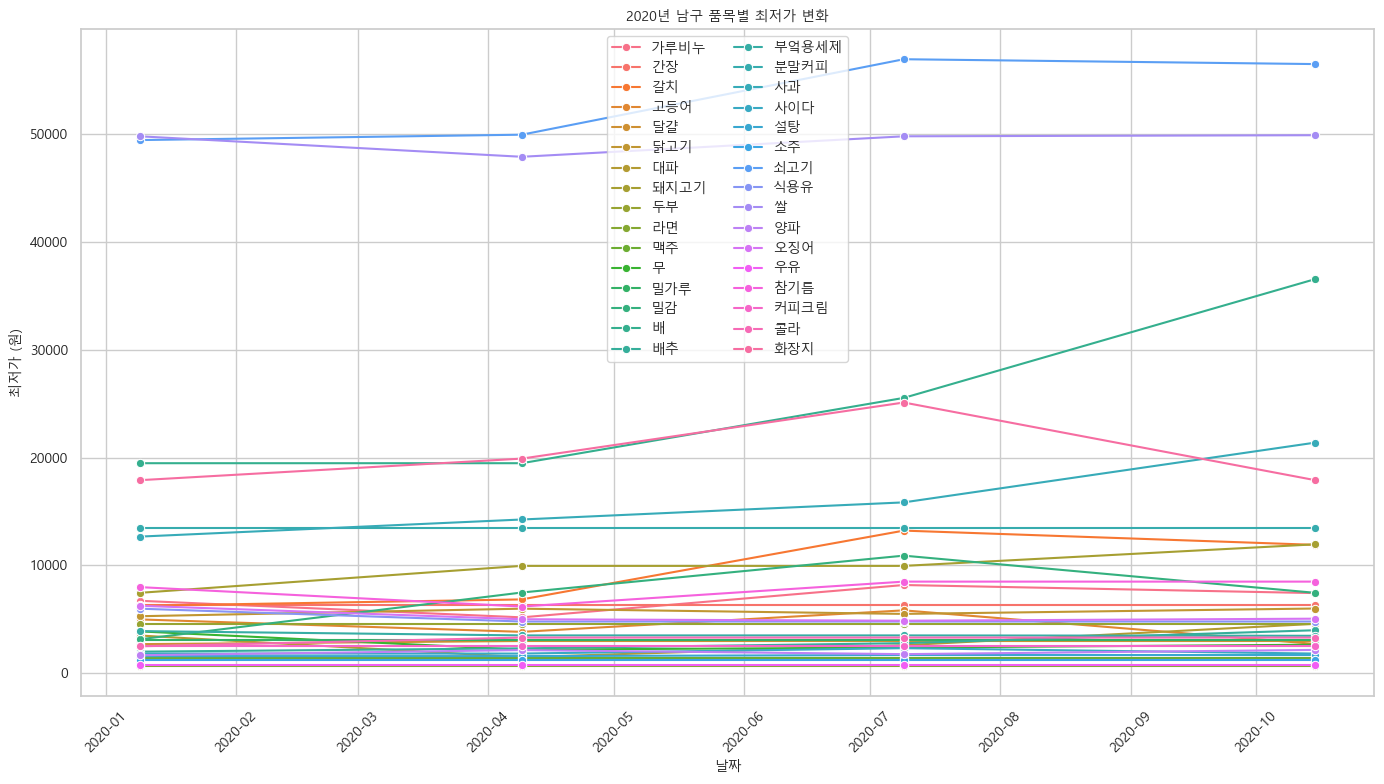

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÎÇ®Íµ¨2020_1q.csv")
q2 = pd.read_csv("ÎÇ®Íµ¨2020_2q.csv")
q3 = pd.read_csv("ÎÇ®Íµ¨2020_3q.csv")
q4 = pd.read_csv("ÎÇ®Íµ¨2020_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2020ÎÖÑ ÎÇ®Íµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÎÇ®Íµ¨2020_min.csv", index=False, encoding="utf-8-sig")

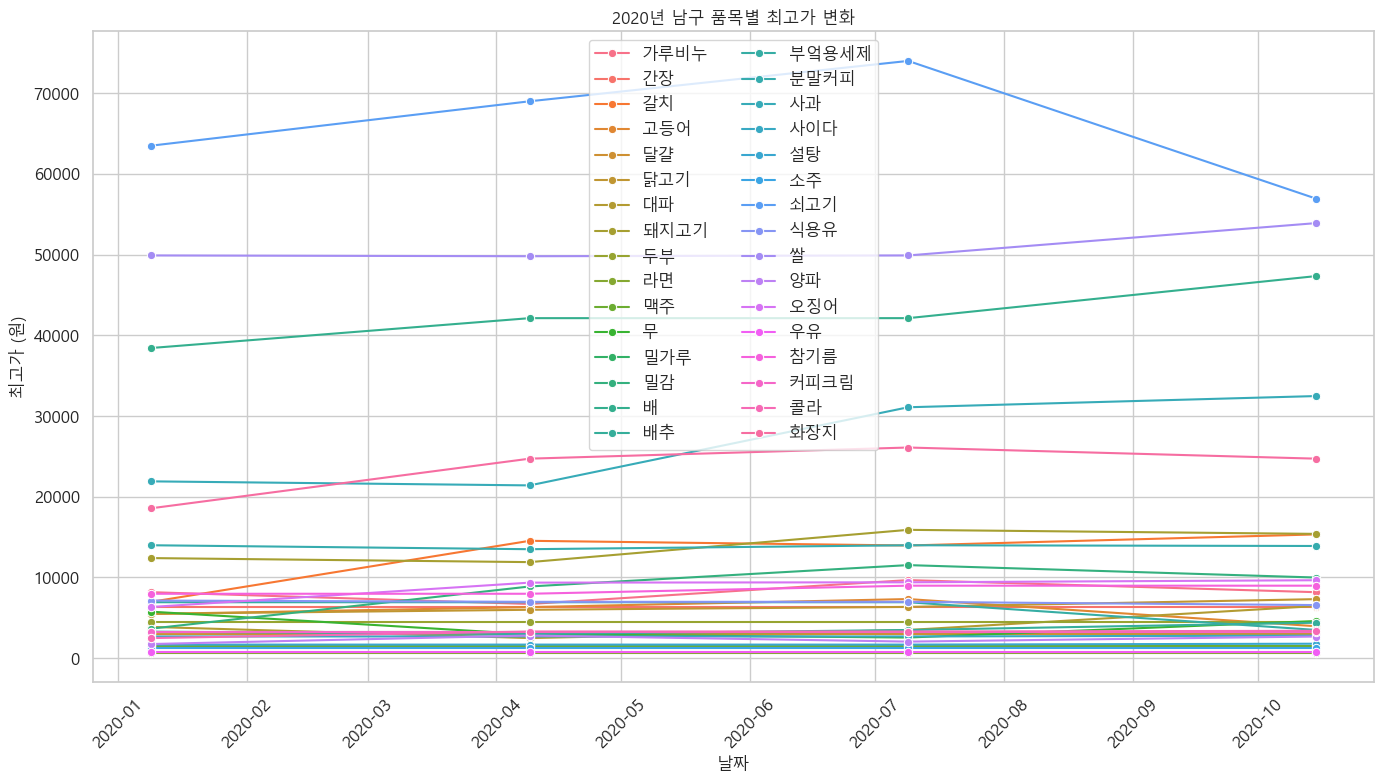

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÎÇ®Íµ¨2020_1q.csv")
q2 = pd.read_csv("ÎÇ®Íµ¨2020_2q.csv")
q3 = pd.read_csv("ÎÇ®Íµ¨2020_3q.csv")
q4 = pd.read_csv("ÎÇ®Íµ¨2020_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2020ÎÖÑ ÎÇ®Íµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÎÇ®Íµ¨2020_max.csv", index=False, encoding="utf-8-sig")